In [516]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [517]:
Tsun = 0.962
Tshadow = 0.598

$$
\text{{P}}_{\text{{arduino}}}(t) = \text{{P}}_{\text{{baseline}}}(t) = 25.139826 \text{ mA } \times 5 \text{ V}
$$

$$
\text{{P}}_{\text{{accel}}}(t) = \begin{cases} 
0.671484 \text{ mA } \times 5 \text{ V} & \text{{if }} \text{{adxl\_on}} = \text{{True}} \\ 
0.227025 \text{ mA } \times 5 \text{ V} & \text{{otherwise}} \\
\end{cases}
$$

$$
\text{{P}}_{\text{{bar}}}(t) = \begin{cases} 
0.245233 \text{ mA } \times 5 \text{ V} & \text{{if }} \text{{bmp\_on}} = \text{{True}} \\ 
0.037279 \text{ mA } \times 5 \text{ V} & \text{{otherwise}} \\
\end{cases}
$$

$$
\text{{P}}_{\text{{radio}}}(t) = \begin{cases} 
148.080381 \text{ mA } \times 5 \text{ V} & \text{{if }} \text{{radio\_on}} = \text{{True}} \\ 
27.067654 \text{ mA } \times 5 \text{ V} & \text{{otherwise}} \\
\end{cases}
$$

$$
\text{{adxl\_on}}(t) = \begin{cases} 
\text{{True}} & \text{{if }} t - \text{{adxl\_time}} \geq 0.05 \text{{ s and }} (\neg \text{{bmp\_on}}) \text{{ and }} (\neg \text{{radio\_on}}) \\
\text{{False}} & \text{{if }} \text{{adxl\_on}} \text{{ and }} t - \text{{adxl\_time}} \geq 2.168878 \text{ ms} \\
\text{{adxl\_on}} & \text{{otherwise}} \\
\end{cases}
$$

$$
\text{{bmp\_on}}(t) = \begin{cases} 
\text{{True}} & \text{{if }} t - \text{{bmp\_time}} \geq 0.2 \text{{ s and }} (\neg \text{{adxl\_on}}) \text{{ and }} (\neg \text{{radio\_on}}) \\
\text{{False}} & \text{{if }} \text{{bmp\_on}} \text{{ and }} t - \text{{bmp\_time}} \geq 2.542896 \text{ ms} \\
\text{{bmp\_on}} & \text{{otherwise}} \\
\end{cases}
$$

$$
\text{{radio\_on}}(t) = \begin{cases} 
\text{{True}} & \text{{if }} t - \text{{radio\_time}} \geq 1.0 \text{{ s and }} (\neg \text{{adxl\_on}}) \text{{ and }} (\neg \text{{bmp\_on}}) \\
\text{{False}} & \text{{if }} \text{{radio\_on}} \text{{ and }} t - \text{{radio\_time}} \geq 92.394886 \text{ ms} \\
\text{{radio\_on}} & \text{{otherwise}} \\
\end{cases}
$$


In [518]:
adxl_time = 0
adxl_on = False

bmp_time = 0
bmp_on = False

radio_time = 0
radio_on = False

voltage = 5.0

i_base = 25.13982666294762

i_adxl_active = 25.81131132760054 - i_base
i_adxl_sleep = 25.36685217951126 - i_base
t_adxl_active = 216.8878546757573 / 100 / 1000

i_bmp_active = 25.385059789625476 - i_base
i_bmp_sleep = 25.177106143765716 - i_base
t_bmp_active = 254.2896980598826 / 100 / 1000

i_radio_active = 173.2202077990582 - i_base
i_radio_sleep = 52.20748105046516 - i_base
t_radio_active = 92.39488681851802 / 1000

print("i_base: ", i_base)
print("i_adxl_active: ", i_adxl_active)
print("i_adxl_sleep: ", i_adxl_sleep)
print("t_adxl_active: ", t_adxl_active)
print("i_bmp_active: ", i_bmp_active)
print("i_bmp_sleep: ", i_bmp_sleep)
print("t_bmp_active: ", t_bmp_active)
print("i_radio_active: ", i_radio_active)
print("i_radio_sleep: ", i_radio_sleep)
print("t_radio_active: ", t_radio_active)


def load_accelerometer(t):
    global adxl_time, bmp_on, radio_on, adxl_on

    if t - adxl_time >= 0.05 and (not bmp_on) and (not radio_on):
        adxl_on = True
        adxl_time = t
    
    if (adxl_on and t - adxl_time >= t_adxl_active):
        adxl_on = False
    
    if adxl_on:
        return voltage * i_adxl_active / 1000
    else:
        return voltage * i_adxl_sleep / 1000 
    
    
def load_barometer(t):
    global bmp_time, bmp_on, radio_on, adxl_on

    if t - bmp_time >= 0.2 and (not adxl_on) and (not radio_on):
        bmp_on = True
        bmp_time = t
    
    if (bmp_on and t - bmp_time >= t_bmp_active):
        bmp_on = False
    
    if bmp_on:
        return voltage * i_bmp_active / 1000
    else:
        return voltage * i_bmp_sleep / 1000


def load_radio(t):
    global radio_time, bmp_on, radio_on, adxl_on

    if t - radio_time >= 1.0 and (not adxl_on) and (not bmp_on):
        radio_on = True
        radio_time = t
    
    if (radio_on and t - radio_time >= t_radio_active):
        radio_on = False
    
    if radio_on:
        return voltage * i_radio_active / 1000
    else:
        return voltage * i_radio_sleep / 1000 


def load(t):
    """ load power in W """
    p = i_base * voltage / 1000 # MCU base, W
    p += load_accelerometer(t)
    p += load_barometer(t)
    p += load_radio(t)

    return p

i_base:  25.13982666294762
i_adxl_active:  0.6714846646529189
i_adxl_sleep:  0.22702551656363923
t_adxl_active:  0.0021688785467575728
i_bmp_active:  0.24523312667785646
i_bmp_sleep:  0.03727948081809629
t_bmp_active:  0.002542896980598826
i_radio_active:  148.08038113611056
i_radio_sleep:  27.067654387517543
t_radio_active:  0.09239488681851801


In [519]:
tmax = 10.000
N = 20000
dt = tmax/N
t = []
for i in range(N):
    t.append(i * dt)

In [520]:
Pload = []
dCdt = []
for it in t:
    Pload.append(load(it))
    dCdt.append(load(it))


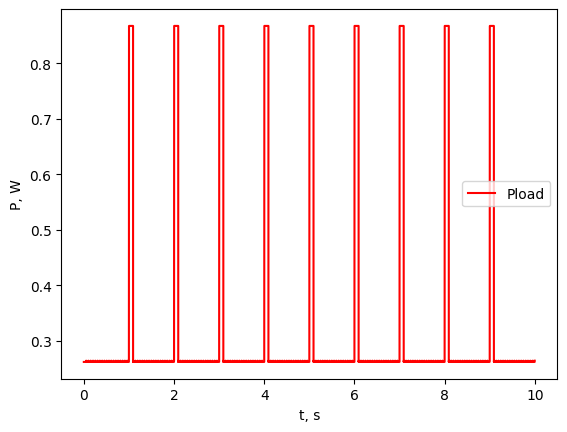

In [538]:
plt.plot(t, Pload, color='red')
plt.legend(['Pload'])
plt.xlabel('t, s')
plt.ylabel('P, W')

plt.savefig('fig.png', bbox_inches='tight')

In [522]:
C0 = 0 # начальные условия - нулевые

# Задаём правую часть ДУ
def diffEq(x, t):
    dCdt = load(t)
    return dCdt

# Solve ODE
#C = odeint(diffEq, C0, t, hmax=0.01*(t[1]-t[0]))
C = [0]
for i in range(1, len(t)):
    C.append(C[i-1] + dt * Pload[i])

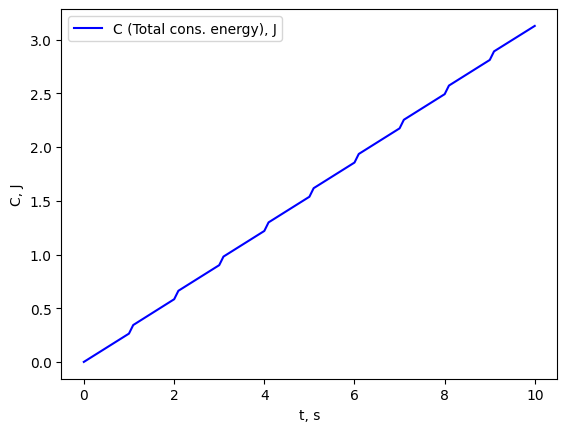

In [536]:
fig, ax1 = plt.subplots()
ax1.plot(t, C, 'b-', label='C (Total cons. energy), J')
ax1.set_xlabel('t, s')
ax1.set_ylabel('C, J')
ax1.legend(loc='upper left')

# Create a secondary Y-axis for Watts
ax2 = ax1.twinx()
ax2.plot(t, Pload, 'r-', label='P (Power), W')
ax2.set_ylabel('P, W')
ax2.legend(loc='upper right')
ax2.set_ylim(ymin=0)


# Save the figure
plt.savefig('fig1.png', bbox_inches='tight')
plt.show()

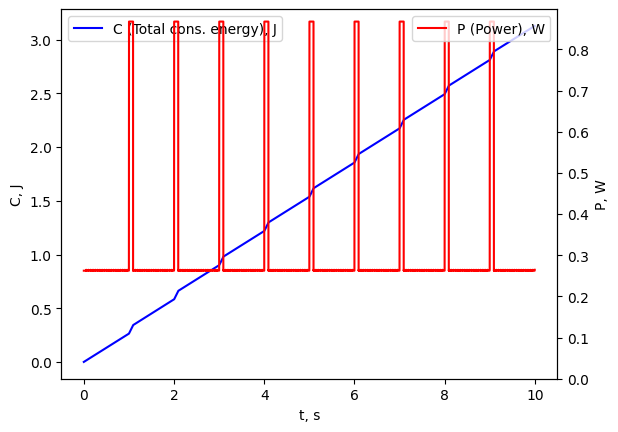

In [537]:
fig, ax1 = plt.subplots()
ax1.plot(t, C, 'b-', label='C (Total cons. energy), J')
ax1.set_xlabel('t, s')
ax1.set_ylabel('C, J')
ax1.legend(loc='upper left')

# Create a secondary Y-axis for Watts
ax2 = ax1.twinx()
ax2.plot(t, Pload, 'r-', label='P (Power), W')
ax2.set_ylabel('P, W')
ax2.legend(loc='upper right')
ax2.set_ylim(ymin=0)


# Save the figure
plt.savefig('fig2.png', bbox_inches='tight')
plt.show()

In [524]:
print(C[-1])

3.1283342550667532


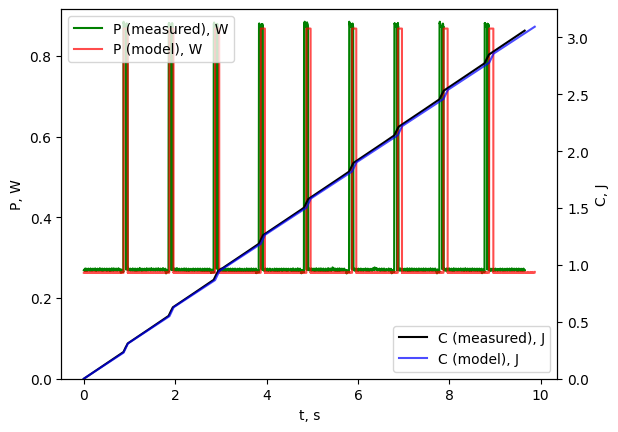

In [543]:
import scipy
import numpy 
import pandas as pd

a=1.2393985838010886
b=1
c=-9.388948900526534

with open('profile.txt', 'r') as file:
    data_raw = [float(line.strip()) for line in file]

y_values = [voltage * ((value/10)**(1 / b) / a - c) / 1000 for value in data_raw]

skew = 260

y_values = y_values[350:]
C_c = C[skew:]
C_c = [C_c[i] - C[skew] for i in range(len(C_c))]

t_c = t[skew:]
t_c = [t_c[i] - t[skew] for i in range(len(t_c))]

Pload_c = Pload[skew:]

y1_values = [0]
for i in range(1, len(y_values)):
    y1_values.append((y_values[i] / 1000) + y1_values[i-1])

x_values = numpy.arange(0, len(y_values), 1) / 1000

x_values_interp = scipy.interpolate.interp1d(numpy.arange(len(x_values)), x_values)
x_values_stretch = x_values_interp(numpy.linspace(0, len(x_values)-1, N))

y_values_interp = scipy.interpolate.interp1d(numpy.arange(len(y_values)), y_values)
y_values_stretch = y_values_interp(numpy.linspace(0, len(y_values)-1, N))

y1_values_interp = scipy.interpolate.interp1d(numpy.arange(len(y1_values)), y1_values)
y1_values_stretch = y1_values_interp(numpy.linspace(0, len(y1_values)-1, N))

fig, ax1 = plt.subplots()
ax1.plot(x_values_stretch,y_values_stretch, '-', color='green', label='P (measured), W')
ax1.plot(t_c, Pload_c, 'r-', label='P (model), W', alpha=0.7)
ax1.set_xlabel('t, s')
ax1.set_ylabel('P, W')
ax1.set_ylim(ymin=0)
ax1.legend(loc='upper left')

# Create a secondary Y-axis for Watts
ax2 = ax1.twinx()
ax2.plot(x_values_stretch, y1_values_stretch, '-', color='black', label='C (measured), J')
ax2.plot(t_c, C_c, 'b-', label='C (model), J' , alpha=0.7)
ax2.set_ylabel('C, J')
ax2.legend(loc='lower right')
ax2.set_ylim(ymin=0)

# Save the figure
plt.savefig('fig3.png', bbox_inches='tight')
plt.show()

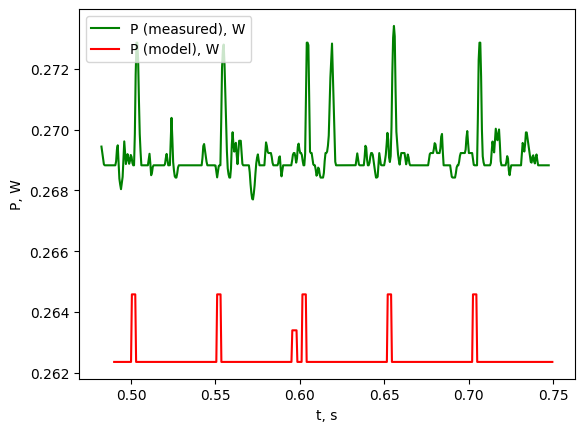

In [545]:
fig, ax1 = plt.subplots()
ax1.plot(x_values_stretch[1000:1550],y_values_stretch[1000:1550], '-', color='green', label='P (measured), W')
ax1.plot(t_c[980:1500], Pload_c[730:1250], 'r-', label='P (model), W')
ax1.set_xlabel('t, s')
ax1.set_ylabel('P, W')
ax1.legend(loc='upper left')

# Save the figure
plt.savefig('fig5.png', bbox_inches='tight')
plt.show()

In [548]:
meas_c = (y1_values[-1] / t_c[-1]) * 4
model_c = (C_c[-1] / t_c[-1]) * 4
print(meas_c)
print(model_c)

print(model_c / meas_c)

print(C_c[-1] / 10 * 3600 * 4)
print(y1_values[-1] / 10  * 3600 * 4)

1.2401240778880729
1.2540519712880898
1.0112310482865037
4455.671735026008
4406.18565121788
